# Pittsburgh Auto Dealership & Population Analysis
### By: Nate Guio

#### Import necessary libraries for pulling Pittsburgh Zip Code data.

In [2]:
import pandas as pd
import numpy as np
import requests

In [3]:
!pip install bs4

     |████████████████████████████████| 102kB 19.3MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [4]:
!pip install lxml
#import lxml

     |████████████████████████████████| 5.8MB 18.8MB/s eta 0:00:01


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Allegheny County, PA - Pennsylvania ZIP Codes
  </title>
  <meta content="Allegheny County, PA zip codes. Detailed information on all the Zip Codes of Allegheny County." name="description"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="https://www.zip-codes.com/county/pa-allegheny.asp" rel="canonical"/>
  <link href="https://www.zip-codes.com/m/county/pa-allegheny.asp" media="only screen and (max-width: 640px)" rel="alternate"/>
  <script async="" src="https://www.zip-codes.com/m/theme/ga/local-analytics.js">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag('js', new Date());gtag('config', 'UA-23873959-1');
  </script>
  <script async="async" src="https://www.googletagservices.com/tag/js/gpt.js">
  </script>
  <script>
   var googletag = googletag || {};
  googletag.cmd = googletag.cmd || [
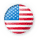

In [5]:
#Use zip-codes.com to scrape zipcodes from Allegheny county, Pa
c_url = requests.get('https://www.zip-codes.com/county/pa-allegheny.asp').text

from bs4 import BeautifulSoup

soup = BeautifulSoup(c_url,'lxml')

print(soup.prettify())



In [6]:
Table = soup.find('table',{'class':'statTable'})
Table

<table border="0" cellpadding="0" cellspacing="0" class="statTable" width="99%"><tr><td class="label"><strong>ZIP Code</strong></td><td class="info"><strong>Classification</strong></td><td class="info"><strong>City</strong></td><td class="info"><strong>Population</strong></td><td class="info"><strong>Timezone</strong></td><td class="info"><strong>Area Code(s)</strong></td></tr><tr><td class="label"><a href="/zip-code/15006/zip-code-15006.asp" style="text-decoration:underline;" title="ZIP Code 15006, BAIRDFORD, PA">ZIP Code 15006</a></td><td class="info">P.O. Box</td><td class="info"><a href="/city/pa-bairdford.asp" title="Bairdford, PA">Bairdford</a></td><td class="info">240</td><td class="info">Eastern</td><td class="info">724</td></tr><tr><td class="label"><a href="/zip-code/15007/zip-code-15007.asp" style="text-decoration:underline;" title="ZIP Code 15007, BAKERSTOWN, PA">ZIP Code 15007</a></td><td class="info">General</td><td class="info"><a href="/city/pa-bakerstown.asp" title="Ba

In [7]:
#take all rows and columns from the table and place into a dataframe
table_tr = Table.find_all('tr')

frame = []

for tr in table_tr:

    row = tr.find_all('td')

    row = [tr.text.strip() for tr in row]

    if row:

        frame.append(row)

        df_pitt = pd.DataFrame(frame, columns=["ZIP_Code", "Classification", "City","Population","TimeZone","AreaCodes"])

df_pitt

,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
0,ZIP Code,Classification,City,Population,Timezone,Area Code(s)
1,ZIP Code 15006,P.O. Box,Bairdford,240,Eastern,724
2,ZIP Code 15007,General,Bakerstown,323,Eastern,724
3,ZIP Code 15014,General,Brackenridge,"3,184",Eastern,724/878
4,ZIP Code 15015,General,Bradfordwoods,"1,175",Eastern,724/412
...,...,...,...,...,...,...
137,ZIP Code 15283,Unique,Pittsburgh,0,Eastern,412/724
138,ZIP Code 15286,Unique,Pittsburgh,0,Eastern,412/724
139,ZIP Code 15289,Unique,Pittsburgh,0,Eastern,412/878
140,ZIP Code 15290,General,Pittsburgh,0,Eastern,412/724


In [8]:
#Remove the first row of headers
df_pitt = df_pitt.drop([0],axis=0)
df_pitt.head()

,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
1,ZIP Code 15006,P.O. Box,Bairdford,240,Eastern,724
2,ZIP Code 15007,General,Bakerstown,323,Eastern,724
3,ZIP Code 15014,General,Brackenridge,"3,184",Eastern,724/878
4,ZIP Code 15015,General,Bradfordwoods,"1,175",Eastern,724/412
5,ZIP Code 15017,General,Bridgeville,"16,213",Eastern,412


In [9]:
#Remove 'Zip Code' from the first column
df_pitt['ZIP_Code'] = df_pitt['ZIP_Code'].map(lambda x: x.lstrip('ZIP Code'))
df_pitt.head()

,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
1,15006,P.O. Box,Bairdford,240,Eastern,724
2,15007,General,Bakerstown,323,Eastern,724
3,15014,General,Brackenridge,"3,184",Eastern,724/878
4,15015,General,Bradfordwoods,"1,175",Eastern,724/412
5,15017,General,Bridgeville,"16,213",Eastern,412


In [10]:
#check datatypes for Zip_code and  population
df_pitt.dtypes

ZIP_Code          object
Classification    object
City              object
Population        object
TimeZone          object
AreaCodes         object
dtype: object

In [11]:
#remove commas
df_pitt['Population'] = df_pitt['Population'].str.replace(',', '')
df_pitt.head()

,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
1,15006,P.O. Box,Bairdford,240,Eastern,724
2,15007,General,Bakerstown,323,Eastern,724
3,15014,General,Brackenridge,3184,Eastern,724/878
4,15015,General,Bradfordwoods,1175,Eastern,724/412
5,15017,General,Bridgeville,16213,Eastern,412


In [12]:
#convert zipcode and population to numbers
df_pitt[["ZIP_Code","Population"]] = df_pitt[["ZIP_Code","Population"]].apply(pd.to_numeric)
df_pitt.head()

,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
1,15006,P.O. Box,Bairdford,240,Eastern,724
2,15007,General,Bakerstown,323,Eastern,724
3,15014,General,Brackenridge,3184,Eastern,724/878
4,15015,General,Bradfordwoods,1175,Eastern,724/412
5,15017,General,Bridgeville,16213,Eastern,412


In [13]:
df_pitt.dtypes

ZIP_Code           int64
Classification    object
City              object
Population         int64
TimeZone          object
AreaCodes         object
dtype: object

#### Alternate Geocoder

In [14]:
!pip install geocoder


     |████████████████████████████████| 102kB 18.4MB/s ta 0:00:01
     |████████████████████████████████| 829kB 35.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 24.5MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/74/bc/50/ae030267a192919b289f84661cfeb5573cf383841c543e8696
Successfully built future


In [15]:
df_pitt.reset_index(inplace=True)
df_pitt.head()

,index,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
0,1,15006,P.O. Box,Bairdford,240,Eastern,724
1,2,15007,General,Bakerstown,323,Eastern,724
2,3,15014,General,Brackenridge,3184,Eastern,724/878
3,4,15015,General,Bradfordwoods,1175,Eastern,724/412
4,5,15017,General,Bridgeville,16213,Eastern,412


In [16]:
df_pitt.drop("index",axis =1, inplace=True)
df_pitt.head()

,ZIP_Code,Classification,City,Population,TimeZone,AreaCodes
0,15006,P.O. Box,Bairdford,240,Eastern,724
1,15007,General,Bakerstown,323,Eastern,724
2,15014,General,Brackenridge,3184,Eastern,724/878
3,15015,General,Bradfordwoods,1175,Eastern,724/412
4,15017,General,Bridgeville,16213,Eastern,412


#### Possible site: http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=42003

https://www.bestplaces.net/find/zip.aspx?st=pa&county=42003

https://www.zip-codes.com/county/pa-allegheny.asp

#### Import US Zip code Library to retirve up to date population data, median home value and latitude/longitude for each zipcode

In [17]:
!pip install uszipcode

     |████████████████████████████████| 378kB 32.6MB/s eta 0:00:01
     |████████████████████████████████| 204kB 39.2MB/s eta 0:00:01
     |████████████████████████████████| 122kB 44.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 17.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/7e/f5/4b/c19e6276126325eb8071b273347c05a830c37a82b9b3b81510
Successfully built autopep8


In [18]:
from uszipcode import SearchEngine

In [19]:
search = SearchEngine(simple_zipcode=True)

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [21]:
#Test the search function
zipcode = search.by_zipcode("26062")

In [22]:
zipcode.to_json()

'{\n    "zipcode": "26062",\n    "zipcode_type": "Standard",\n    "major_city": "Weirton",\n    "post_office_city": "Weirton, WV",\n    "common_city_list": [\n        "Weirton"\n    ],\n    "county": "Hancock County",\n    "state": "WV",\n    "lat": 40.42,\n    "lng": -80.57,\n    "timezone": "Eastern",\n    "radius_in_miles": 5.0,\n    "area_code_list": [\n        "304",\n        "681"\n    ],\n    "population": 21801,\n    "population_density": 785.0,\n    "land_area_in_sqmi": 27.76,\n    "water_area_in_sqmi": 1.21,\n    "housing_units": 10532,\n    "occupied_housing_units": 9672,\n    "median_home_value": 87000,\n    "median_household_income": 38582,\n    "bounds_west": -80.632732,\n    "bounds_east": -80.517689,\n    "bounds_north": 40.482775,\n    "bounds_south": 40.370844\n}'

In [23]:
import json
from pandas.io.json import json_normalize


In [24]:
#Loop through each zipcode in df_pitt to retrieve all data fields uszipcode offers
pittdata = []
for i in range(len(df_pitt)):
    ZIP_Code = df_pitt.loc[i, 'ZIP_Code']
    zipcode = search.by_zipcode(ZIP_Code)
    pittdata.append(zipcode.to_json())
#df = pd.DataFrame.from_dict(pittdata, orient='columns')
    #data = json.loads(pittdata)
    #json_normalize(data)
pittdata    
    #df_pittzip = pd.DataFrame(pittdata, columns=["ZIP_Code", "ZipCodeType", "MajorCity","PostOfficeCity","CommonCityList","County","State","Latitude","Longitude","timezone","radius_in_miles","area_code_list","population","population_density","land_area_in_sqmi","water_area_in_sqmi","housing_units","occupied_housing_units","median_home_value","median_household_income","bounds_west","bounds_east","bounds_north","bounds_south"])
#data

['{\n    "zipcode": "15006",\n    "zipcode_type": "PO Box",\n    "major_city": "Bairdford",\n    "post_office_city": "Bairdford, PA",\n    "common_city_list": [\n        "Bairdford"\n    ],\n    "county": "Allegheny County",\n    "state": "PA",\n    "lat": 40.633,\n    "lng": -79.878,\n    "timezone": "Eastern",\n    "radius_in_miles": 0.22727272727272727,\n    "area_code_list": [\n        "724"\n    ],\n    "population": 240,\n    "population_density": 975.0,\n    "land_area_in_sqmi": 0.25,\n    "water_area_in_sqmi": 0.0,\n    "housing_units": 118,\n    "occupied_housing_units": 108,\n    "median_home_value": 71300,\n    "median_household_income": 50114,\n    "bounds_west": -79.885407,\n    "bounds_east": -79.870748,\n    "bounds_north": 40.638455,\n    "bounds_south": 40.628512\n}',
 '{\n    "zipcode": "15007",\n    "zipcode_type": "Standard",\n    "major_city": "Bakerstown",\n    "post_office_city": "Bakerstown, PA",\n    "common_city_list": [\n        "Bakerstown"\n    ],\n    "cou

In [25]:
#Convert df_pitt into a dictionary
pittdata2 = []
for i in range(len(df_pitt)):
    ZIP_Code = df_pitt.loc[i, 'ZIP_Code']
    zipcode = search.by_zipcode(ZIP_Code)
    pittdata2.append(zipcode.to_dict())
    
pittdata2

[{'zipcode': '15006',
  'zipcode_type': 'PO Box',
  'major_city': 'Bairdford',
  'post_office_city': 'Bairdford, PA',
  'common_city_list': ['Bairdford'],
  'county': 'Allegheny County',
  'state': 'PA',
  'lat': 40.633,
  'lng': -79.878,
  'timezone': 'Eastern',
  'radius_in_miles': 0.22727272727272727,
  'area_code_list': ['724'],
  'population': 240,
  'population_density': 975.0,
  'land_area_in_sqmi': 0.25,
  'water_area_in_sqmi': 0.0,
  'housing_units': 118,
  'occupied_housing_units': 108,
  'median_home_value': 71300,
  'median_household_income': 50114,
  'bounds_west': -79.885407,
  'bounds_east': -79.870748,
  'bounds_north': 40.638455,
  'bounds_south': 40.628512},
 {'zipcode': '15007',
  'zipcode_type': 'Standard',
  'major_city': 'Bakerstown',
  'post_office_city': 'Bakerstown, PA',
  'common_city_list': ['Bakerstown'],
  'county': 'Allegheny County',
  'state': 'PA',
  'lat': 40.655,
  'lng': -79.933,
  'timezone': 'Eastern',
  'radius_in_miles': 0.625,
  'area_code_list'

In [26]:
zip_latlong = pd.DataFrame(pittdata2)
zip_latlong.head()

,zipcode,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,timezone,...,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,bounds_west,bounds_east,bounds_north,bounds_south
0,15006,PO Box,Bairdford,"Bairdford, PA",[Bairdford],Allegheny County,PA,40.633,-79.878,Eastern,...,0.25,0.00,118.0,108.0,71300.0,50114.0,-79.885407,-79.870748,40.638455,40.628512
1,15007,Standard,Bakerstown,"Bakerstown, PA",[Bakerstown],Allegheny County,PA,40.655,-79.933,Eastern,...,0.33,0.00,136.0,131.0,112500.0,73352.0,-79.937255,-79.924386,40.661402,40.645880
2,15014,Standard,Brackenridge,"Brackenridge, PA",[Brackenridge],Allegheny County,PA,40.609,-79.742,Eastern,...,0.51,0.04,1617.0,1423.0,72000.0,43500.0,-79.751053,-79.733169,40.615580,40.600666
3,15015,Standard,Bradfordwoods,"Bradfordwoods, PA",[Bradfordwoods],Allegheny County,PA,40.640,-80.080,Eastern,...,0.94,0.00,499.0,476.0,271300.0,106875.0,-80.096541,-80.069356,40.646060,40.629308
4,15017,Standard,Bridgeville,"Bridgeville, PA",[Bridgeville],Allegheny County,PA,40.350,-80.130,Eastern,...,13.03,0.05,7875.0,7392.0,155500.0,59715.0,-80.183462,-80.087691,40.393352,40.291352


In [27]:
#drop the NA rows from the data
zip_latlong2 = zip_latlong.dropna()
zip_latlong2.head()

,zipcode,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,timezone,...,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,bounds_west,bounds_east,bounds_north,bounds_south
0,15006,PO Box,Bairdford,"Bairdford, PA",[Bairdford],Allegheny County,PA,40.633,-79.878,Eastern,...,0.25,0.00,118.0,108.0,71300.0,50114.0,-79.885407,-79.870748,40.638455,40.628512
1,15007,Standard,Bakerstown,"Bakerstown, PA",[Bakerstown],Allegheny County,PA,40.655,-79.933,Eastern,...,0.33,0.00,136.0,131.0,112500.0,73352.0,-79.937255,-79.924386,40.661402,40.645880
2,15014,Standard,Brackenridge,"Brackenridge, PA",[Brackenridge],Allegheny County,PA,40.609,-79.742,Eastern,...,0.51,0.04,1617.0,1423.0,72000.0,43500.0,-79.751053,-79.733169,40.615580,40.600666
3,15015,Standard,Bradfordwoods,"Bradfordwoods, PA",[Bradfordwoods],Allegheny County,PA,40.640,-80.080,Eastern,...,0.94,0.00,499.0,476.0,271300.0,106875.0,-80.096541,-80.069356,40.646060,40.629308
4,15017,Standard,Bridgeville,"Bridgeville, PA",[Bridgeville],Allegheny County,PA,40.350,-80.130,Eastern,...,13.03,0.05,7875.0,7392.0,155500.0,59715.0,-80.183462,-80.087691,40.393352,40.291352


In [28]:
zip_latlong2.reset_index(inplace = True)
zip_latlong2.head()

,index,zipcode,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,...,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,bounds_west,bounds_east,bounds_north,bounds_south
0,0,15006,PO Box,Bairdford,"Bairdford, PA",[Bairdford],Allegheny County,PA,40.633,-79.878,...,0.25,0.00,118.0,108.0,71300.0,50114.0,-79.885407,-79.870748,40.638455,40.628512
1,1,15007,Standard,Bakerstown,"Bakerstown, PA",[Bakerstown],Allegheny County,PA,40.655,-79.933,...,0.33,0.00,136.0,131.0,112500.0,73352.0,-79.937255,-79.924386,40.661402,40.645880
2,2,15014,Standard,Brackenridge,"Brackenridge, PA",[Brackenridge],Allegheny County,PA,40.609,-79.742,...,0.51,0.04,1617.0,1423.0,72000.0,43500.0,-79.751053,-79.733169,40.615580,40.600666
3,3,15015,Standard,Bradfordwoods,"Bradfordwoods, PA",[Bradfordwoods],Allegheny County,PA,40.640,-80.080,...,0.94,0.00,499.0,476.0,271300.0,106875.0,-80.096541,-80.069356,40.646060,40.629308
4,4,15017,Standard,Bridgeville,"Bridgeville, PA",[Bridgeville],Allegheny County,PA,40.350,-80.130,...,13.03,0.05,7875.0,7392.0,155500.0,59715.0,-80.183462,-80.087691,40.393352,40.291352


In [29]:
#zip_latlong2.drop(['index'],axis=1, inplace = True)
#df_pitt.drop("index",axis =1, inplace=True)
del zip_latlong2['index']

In [30]:
zip_latlong2.head()

,zipcode,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,timezone,...,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,bounds_west,bounds_east,bounds_north,bounds_south
0,15006,PO Box,Bairdford,"Bairdford, PA",[Bairdford],Allegheny County,PA,40.633,-79.878,Eastern,...,0.25,0.00,118.0,108.0,71300.0,50114.0,-79.885407,-79.870748,40.638455,40.628512
1,15007,Standard,Bakerstown,"Bakerstown, PA",[Bakerstown],Allegheny County,PA,40.655,-79.933,Eastern,...,0.33,0.00,136.0,131.0,112500.0,73352.0,-79.937255,-79.924386,40.661402,40.645880
2,15014,Standard,Brackenridge,"Brackenridge, PA",[Brackenridge],Allegheny County,PA,40.609,-79.742,Eastern,...,0.51,0.04,1617.0,1423.0,72000.0,43500.0,-79.751053,-79.733169,40.615580,40.600666
3,15015,Standard,Bradfordwoods,"Bradfordwoods, PA",[Bradfordwoods],Allegheny County,PA,40.640,-80.080,Eastern,...,0.94,0.00,499.0,476.0,271300.0,106875.0,-80.096541,-80.069356,40.646060,40.629308
4,15017,Standard,Bridgeville,"Bridgeville, PA",[Bridgeville],Allegheny County,PA,40.350,-80.130,Eastern,...,13.03,0.05,7875.0,7392.0,155500.0,59715.0,-80.183462,-80.087691,40.393352,40.291352


In [31]:
#Drop unnecessary columns
ziplatlong3 = zip_latlong2.drop(columns = ['bounds_west','bounds_east','bounds_north','bounds_south'], axis =1)
ziplatlong3.head()

,zipcode,zipcode_type,major_city,post_office_city,common_city_list,county,state,lat,lng,timezone,radius_in_miles,area_code_list,population,population_density,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income
0,15006,PO Box,Bairdford,"Bairdford, PA",[Bairdford],Allegheny County,PA,40.633,-79.878,Eastern,0.227273,[724],240.0,975.0,0.25,0.00,118.0,108.0,71300.0,50114.0
1,15007,Standard,Bakerstown,"Bakerstown, PA",[Bakerstown],Allegheny County,PA,40.655,-79.933,Eastern,0.625000,[724],323.0,972.0,0.33,0.00,136.0,131.0,112500.0,73352.0
2,15014,Standard,Brackenridge,"Brackenridge, PA",[Brackenridge],Allegheny County,PA,40.609,-79.742,Eastern,0.625000,[878],3184.0,6264.0,0.51,0.04,1617.0,1423.0,72000.0,43500.0
3,15015,Standard,Bradfordwoods,"Bradfordwoods, PA",[Bradfordwoods],Allegheny County,PA,40.640,-80.080,Eastern,0.965909,"[412, 724]",1175.0,1256.0,0.94,0.00,499.0,476.0,271300.0,106875.0
4,15017,Standard,Bridgeville,"Bridgeville, PA",[Bridgeville],Allegheny County,PA,40.350,-80.130,Eastern,4.000000,[412],16213.0,1244.0,13.03,0.05,7875.0,7392.0,155500.0,59715.0


In [32]:
ziplatlong4 = ziplatlong3[['zipcode','zipcode_type','major_city','area_code_list','common_city_list','county','housing_units','land_area_in_sqmi','lat','lng','median_home_value','median_household_income','occupied_housing_units','population','population_density','post_office_city','radius_in_miles','state','timezone','water_area_in_sqmi']]
ziplatlong4.head()

,zipcode,zipcode_type,major_city,area_code_list,common_city_list,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi
0,15006,PO Box,Bairdford,[724],[Bairdford],Allegheny County,118.0,0.25,40.633,-79.878,71300.0,50114.0,108.0,240.0,975.0,"Bairdford, PA",0.227273,PA,Eastern,0.00
1,15007,Standard,Bakerstown,[724],[Bakerstown],Allegheny County,136.0,0.33,40.655,-79.933,112500.0,73352.0,131.0,323.0,972.0,"Bakerstown, PA",0.625000,PA,Eastern,0.00
2,15014,Standard,Brackenridge,[878],[Brackenridge],Allegheny County,1617.0,0.51,40.609,-79.742,72000.0,43500.0,1423.0,3184.0,6264.0,"Brackenridge, PA",0.625000,PA,Eastern,0.04
3,15015,Standard,Bradfordwoods,"[412, 724]",[Bradfordwoods],Allegheny County,499.0,0.94,40.640,-80.080,271300.0,106875.0,476.0,1175.0,1256.0,"Bradfordwoods, PA",0.965909,PA,Eastern,0.00
4,15017,Standard,Bridgeville,[412],[Bridgeville],Allegheny County,7875.0,13.03,40.350,-80.130,155500.0,59715.0,7392.0,16213.0,1244.0,"Bridgeville, PA",4.000000,PA,Eastern,0.05


In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [34]:
!pip install geocoder
import geocoder

In [35]:

location = geocoder.arcgis('Pittsburgh, Pennsylvania')
location = location.latlng
#geolocator = Nominatim(user_agent="pitt_explorer")
#location = geolocator.geocode(address)
latitude = location[0]
longitude = location[1]
print('The geograpical coordinate of Pittsburgh are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pittsburgh are 40.438510000000065, -79.99733999999995.


In [36]:
# create map of Pittsburgh using latitude and longitude values from the ziplatlong4 dataframe
map_Pitt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, major_city in zip(ziplatlong4['lat'], ziplatlong4['lng'], ziplatlong4['major_city']):
    label = '{}'.format(major_city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Pitt)  
    
map_Pitt

##### Link to the Foursquare API

In [37]:
CLIENT_ID = 'QNTZE40AUN0ZS5JOUL0NZYCE2VQWIU5DUG5YNWYNWKUEYFKD' # your Foursquare ID
CLIENT_SECRET = 'O45XDWKMHF5PHHMSC2E4FZZK3RRSDOYF3Z4U0YVBD0XV4XLY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QNTZE40AUN0ZS5JOUL0NZYCE2VQWIU5DUG5YNWYNWKUEYFKD
CLIENT_SECRET:O45XDWKMHF5PHHMSC2E4FZZK3RRSDOYF3Z4U0YVBD0XV4XLY


In [38]:
pitt_latitude = latitude # neighborhood latitude value
pitt_longitude = longitude # neighborhood longitude value

##### Create a search query for anything dealing with cars

In [39]:
LIMIT=200
radius =100000
Auto_Dealership = '4eb1c1623b7b52c0e1adc2ec'
search_query = 'Car'
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&request_Id={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, pitt_latitude, pitt_longitude,Auto_Dealership, radius, LIMIT)
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION,search_query, pitt_latitude, pitt_longitude, radius, LIMIT)
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, pitt_latitude, pitt_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QNTZE40AUN0ZS5JOUL0NZYCE2VQWIU5DUG5YNWYNWKUEYFKD&client_secret=O45XDWKMHF5PHHMSC2E4FZZK3RRSDOYF3Z4U0YVBD0XV4XLY&v=20180605&query=Car&ll=40.438510000000065,-79.99733999999995&radius=100000&limit=200'

In [40]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dba2f8347b43d00235950c0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Pittsburgh',
  'headerFullLocation': 'Pittsburgh',
  'headerLocationGranularity': 'city',
  'query': 'car',
  'totalResults': 316,
  'suggestedBounds': {'ne': {'lat': 41.33851090000096,
    'lng': -78.81705156957031},
   'sw': {'lat': 39.53850909999917, 'lng': -81.17762843042959}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d7480f964a520f1ad36e3',
       'name': 'Krebs Chrysler Jeep Dodge RAM',
       'location': {'address': '100 Krebs Dr',
        'crossStreet': 'Route 8',
        'lat': 40.62356,
        'lng': -79.94332,
        'labeledLatLngs': [{'label': 'd

In [41]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Krebs Chrysler Jeep Dodge RAM,Auto Dealership,40.623560,-79.943320
1,Americas Auto Auction,Automotive Shop,40.131009,-80.333955
2,Three Rivers Chrysler Dodge Jeep RAM,Auto Dealership,40.397601,-80.027551
3,Rohrich Toyota,Auto Dealership,40.403414,-80.020042
4,Bowser Subaru,Auto Dealership,40.320355,-79.940849


In [43]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [44]:
nearby_venues

,name,categories,lat,lng
0,Krebs Chrysler Jeep Dodge RAM,Auto Dealership,40.623560,-79.943320
1,Americas Auto Auction,Automotive Shop,40.131009,-80.333955
2,Three Rivers Chrysler Dodge Jeep RAM,Auto Dealership,40.397601,-80.027551
3,Rohrich Toyota,Auto Dealership,40.403414,-80.020042
4,Bowser Subaru,Auto Dealership,40.320355,-79.940849
5,Lexus of North Hills,Auto Dealership,40.647911,-80.075902
6,Rohrich Lexus,Auto Dealership,40.401810,-80.022070
7,P & W BMW,Auto Dealership,40.454696,-79.947337
8,Tesla,Auto Dealership,40.542095,-80.008420
9,Calabro Tire Service and Auto Service,Automotive Shop,40.361781,-80.092832


In [45]:
#Get Nearby Venues
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            search_query,
            lat, 
            lng, 
            radius, 
            200)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #results = requests.get(url).json()["response"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
Pitt_venues = getNearbyVenues(names=ziplatlong4['major_city'],
                                   latitudes=ziplatlong4['lat'],
                                   longitudes=ziplatlong4['lng']
                                  )

Bairdford
Bakerstown
Brackenridge
Bradfordwoods
Bridgeville
Buena Vista
Bunola
Cheswick
Clairton
Coulters
Creighton
Cuddy
Dravosburg
East Mc Keesport
Elizabeth
Gibsonia
Glassport
Crescent
Harwick
Indianola
Leetsdale
Morgan
Natrona Heights
Oakdale
Russellton
Sturgeon
Tarentum
Warrendale
West Elizabeth
Wexford
Allison Park
Bethel Park
Braddock
Carnegie
Coraopolis
Duquesne
East Pittsburgh
Glenshaw
Homestead
West Mifflin
Imperial
South Park
Mckeesport
Mckeesport
Mckeesport
Mckeesport
Mc Kees Rocks
North Versailles
Oakmont
Pitcairn
Presto
Sewickley
Springdale
Turtle Creek
Monroeville
Verona
Wilmerding
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh
Pittsburgh


In [48]:
print(Pitt_venues.shape)
Pitt_venues.head()

(9600, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bairdford,40.633,-79.878,Krebs Chrysler Jeep Dodge RAM,40.623560,-79.943320,Auto Dealership
1,Bairdford,40.633,-79.878,Lexus of North Hills,40.647911,-80.075902,Auto Dealership
2,Bairdford,40.633,-79.878,A-K Motors Inc,40.604143,-79.549135,Automotive Shop
3,Bairdford,40.633,-79.878,Bobby Rahal Motorcar Company,40.615022,-80.055782,Auto Dealership
4,Bairdford,40.633,-79.878,Tesla,40.542095,-80.008420,Auto Dealership


In [49]:
Pitt_venues['Venue Category'].unique()

array(['Auto Dealership', 'Automotive Shop', 'Gas Station',
       'Rental Car Location', 'Car Wash', 'Auto Workshop', 'Coffee Shop'],
      dtype=object)

In [ ]:
#df[df['coverage'] > 50]
#Pitt_venues_CD = Pitt_venues[Pitt_venues['Venue Category']== 'Auto Dealership']
#print(Pitt_venues_CD.shape)
#Pitt_venues_CD

In [ ]:
#Pitt_venues_CD.reset_index(inplace = True)

In [ ]:
#Pitt_venues_CD.drop("index",axis =1, inplace=True)
#Pitt_venues_CD

In [ ]:
#Pitt_venues_CD.groupby('Neighborhood').count()

In [50]:
Pitt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allison Park,100,100,100,100,100,100
Bairdford,100,100,100,100,100,100
Bakerstown,100,100,100,100,100,100
Bethel Park,100,100,100,100,100,100
Brackenridge,100,100,100,100,100,100
Braddock,100,100,100,100,100,100
Bradfordwoods,100,100,100,100,100,100
Bridgeville,100,100,100,100,100,100
Buena Vista,100,100,100,100,100,100


In [51]:
pitt_sum = Pitt_venues.groupby('Neighborhood').count().reset_index()
pitt_sum['Count'] = pitt_sum['Venue']
pitt_sum = pitt_sum.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
pitt_sum = pitt_sum.sort_values('Count').reset_index(drop=True)
pitt_sum.head()

,Neighborhood,Count
0,Allison Park,100
1,Imperial,100
2,Indianola,100
3,Leetsdale,100
4,Mc Kees Rocks,100


#### Display the Distribution of Venues returned by Neighborhood

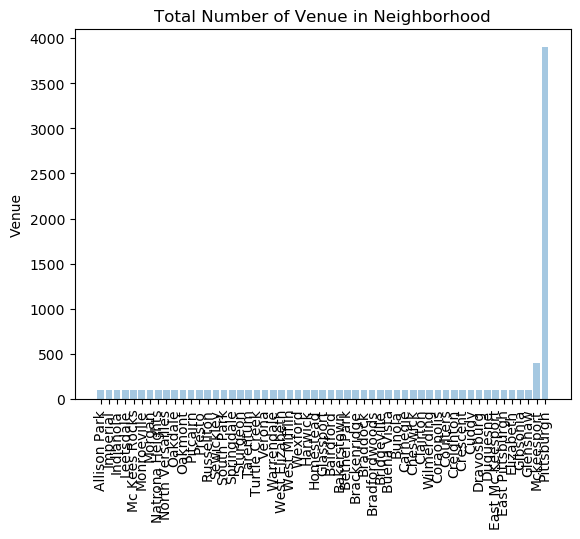

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = pitt_sum.Neighborhood
y_pos = np.arange(len(objects))
performance = pitt_sum.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Neighborhood')
plt.xticks(rotation=90)

plt.show()

In [54]:
# one hot encoding
Pitt_onehot = pd.get_dummies(Pitt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Pitt_onehot['Neighborhood'] = Pitt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Pitt_onehot.columns[-1]] + list(Pitt_onehot.columns[:-1])
Pitt_onehot = Pitt_onehot[fixed_columns]

Pitt_onehot.head()

,Neighborhood,Auto Dealership,Auto Workshop,Automotive Shop,Car Wash,Coffee Shop,Gas Station,Rental Car Location
0,Bairdford,1,0,0,0,0,0,0
1,Bairdford,1,0,0,0,0,0,0
2,Bairdford,0,0,1,0,0,0,0
3,Bairdford,1,0,0,0,0,0,0
4,Bairdford,1,0,0,0,0,0,0


In [54]:
Pitt_onehot.shape

(9600, 8)

In [56]:
Pitt_grouped = Pitt_onehot.groupby('Neighborhood').mean().reset_index()
Pitt_grouped.head()

,Neighborhood,Auto Dealership,Auto Workshop,Automotive Shop,Car Wash,Coffee Shop,Gas Station,Rental Car Location
0,Allison Park,0.76,0.00,0.16,0.02,0.00,0.04,0.02
1,Bairdford,0.74,0.00,0.19,0.02,0.00,0.03,0.02
2,Bakerstown,0.74,0.00,0.18,0.02,0.00,0.04,0.02
3,Bethel Park,0.78,0.01,0.14,0.02,0.01,0.03,0.01
4,Brackenridge,0.79,0.00,0.14,0.01,0.00,0.04,0.02


In [57]:
Pitt_grouped.shape

(55, 8)

In [58]:
num_top_venues = 5

for hood in Pitt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Pitt_grouped[Pitt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allison Park----
                 venue  freq
0      Auto Dealership  0.76
1      Automotive Shop  0.16
2          Gas Station  0.04
3             Car Wash  0.02
4  Rental Car Location  0.02


----Bairdford----
                 venue  freq
0      Auto Dealership  0.74
1      Automotive Shop  0.19
2          Gas Station  0.03
3             Car Wash  0.02
4  Rental Car Location  0.02


----Bakerstown----
                 venue  freq
0      Auto Dealership  0.74
1      Automotive Shop  0.18
2          Gas Station  0.04
3             Car Wash  0.02
4  Rental Car Location  0.02


----Bethel Park----
             venue  freq
0  Auto Dealership  0.78
1  Automotive Shop  0.14
2      Gas Station  0.03
3         Car Wash  0.02
4    Auto Workshop  0.01


----Brackenridge----
                 venue  freq
0      Auto Dealership  0.79
1      Automotive Shop  0.14
2          Gas Station  0.04
3  Rental Car Location  0.02
4             Car Wash  0.01


----Braddock----
                 venue  freq

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhood'] = Pitt_grouped['Neighborhood']

for ind in np.arange(Pitt_grouped.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(Pitt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Allison Park,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
1,Bairdford,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
2,Bakerstown,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
3,Bethel Park,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
4,Brackenridge,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop


In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#### Use Elbow Method to find optimal Number of Clusters to use

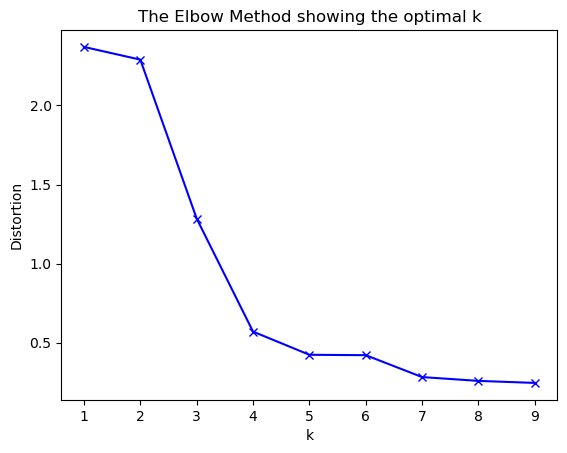

In [62]:
from scipy.spatial.distance import cdist
Pitt_grouped_clustering = Pitt_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(Pitt_grouped_clustering)
    distortions.append(sum(np.min(cdist(Pitt_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / Pitt_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [63]:
# set number of clusters
kclusters = 5

Pitt_grouped_clustering = Pitt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Pitt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 1, 1, 2, 1, 4, 0, 0], dtype=int32)

In [64]:
# add clustering labels
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)

Pitt_merged = ziplatlong4

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Pitt_merged = Pitt_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='major_city')

Pitt_merged.head() # check the last columns!

,zipcode,zipcode_type,major_city,area_code_list,common_city_list,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,15006,PO Box,Bairdford,[724],[Bairdford],Allegheny County,118.0,0.25,40.633,-79.878,71300.0,50114.0,108.0,240.0,975.0,"Bairdford, PA",0.227273,PA,Eastern,0.00,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
1,15007,Standard,Bakerstown,[724],[Bakerstown],Allegheny County,136.0,0.33,40.655,-79.933,112500.0,73352.0,131.0,323.0,972.0,"Bakerstown, PA",0.625000,PA,Eastern,0.00,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
2,15014,Standard,Brackenridge,[878],[Brackenridge],Allegheny County,1617.0,0.51,40.609,-79.742,72000.0,43500.0,1423.0,3184.0,6264.0,"Brackenridge, PA",0.625000,PA,Eastern,0.04,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
3,15015,Standard,Bradfordwoods,"[412, 724]",[Bradfordwoods],Allegheny County,499.0,0.94,40.640,-80.080,271300.0,106875.0,476.0,1175.0,1256.0,"Bradfordwoods, PA",0.965909,PA,Eastern,0.00,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
4,15017,Standard,Bridgeville,[412],[Bridgeville],Allegheny County,7875.0,13.03,40.350,-80.130,155500.0,59715.0,7392.0,16213.0,1244.0,"Bridgeville, PA",4.000000,PA,Eastern,0.05,4,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop


In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Pitt_merged['lat'], Pitt_merged['lng'], Pitt_merged['major_city'], Pitt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
!wget --quiet http://openac-alcogis.opendata.arcgis.com/datasets/9de0e9c07af04e638dbc9cb9070962c2_0.geojson -O Allegheny_County_Municipal_Boundaries.geojson
    
#https://geo.nyu.edu/download/file/stanford-nj696zj1674-geojson.json    
print('GeoJSON file downloaded!')

Pitt_geo = r'Allegheny_County_Municipal_Boundaries.geojson'

#The geograpical coordinate of Pittsburgh are 40.438510000000065, -79.99733999999995.
latitude = 40.43851
longitude = -79.99733999999995

# display Pitt
Pitt_map = folium.Map(location=[latitude, longitude], zoom_start=10)

GeoJSON file downloaded!


In [68]:
#cluster1
Pitt_merged.loc[Pitt_merged['Cluster Labels'] == 0, Pitt_merged.columns[[1] + list(range(5, Pitt_merged.shape[1]))]]

,zipcode_type,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
5,Standard,Allegheny County,389.0,1.88,40.290,-79.790,72100.0,50588.0,340.0,821.0,436.0,"Buena Vista, PA",3.000000,PA,Eastern,0.16,0,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
6,PO Box,Allegheny County,121.0,1.32,40.238,-79.951,24700.0,27250.0,106.0,231.0,175.0,"Bunola, PA",0.511364,PA,Eastern,0.46,0,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
9,PO Box,Allegheny County,64.0,0.20,40.296,-79.800,63300.0,52500.0,63.0,142.0,711.0,"Coulters, PA",0.113636,PA,Eastern,0.09,0,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
14,Standard,Allegheny County,4865.0,26.46,40.260,-79.850,99200.0,55980.0,4526.0,10894.0,412.0,"Elizabeth, PA",5.000000,PA,Eastern,0.55,0,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop


In [69]:
#Cluster2
Pitt_merged.loc[Pitt_merged['Cluster Labels'] == 1, Pitt_merged.columns[[1] + list(range(5, Pitt_merged.shape[1]))]]

,zipcode_type,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
2,Standard,Allegheny County,1617.0,0.51,40.609,-79.742,72000.0,43500.0,1423.0,3184.0,6264.0,"Brackenridge, PA",0.625000,PA,Eastern,0.04,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
3,Standard,Allegheny County,499.0,0.94,40.640,-80.080,271300.0,106875.0,476.0,1175.0,1256.0,"Bradfordwoods, PA",0.965909,PA,Eastern,0.00,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
8,Standard,Allegheny County,7814.0,16.56,40.290,-79.920,102200.0,49548.0,6830.0,15944.0,963.0,"Clairton, PA",4.000000,PA,Eastern,0.49,1,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
12,Standard,Allegheny County,1000.0,0.97,40.350,-79.890,64700.0,41786.0,892.0,1792.0,1851.0,"Dravosburg, PA",1.000000,PA,Eastern,0.09,1,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
13,Standard,Allegheny County,1155.0,0.41,40.385,-79.808,70500.0,40104.0,1007.0,2129.0,5131.0,"East Mc Keesport, PA",0.681818,PA,Eastern,0.00,1,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
18,Standard,Allegheny County,487.0,0.43,40.550,-79.810,96700.0,43491.0,463.0,895.0,2076.0,"Harwick, PA",0.852273,PA,Eastern,0.00,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
21,Standard,Allegheny County,210.0,0.82,40.360,-80.150,85800.0,28542.0,180.0,382.0,464.0,"Morgan, PA",0.909091,PA,Eastern,0.00,1,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
22,Standard,Allegheny County,5639.0,12.38,40.640,-79.730,91000.0,45246.0,5112.0,11588.0,936.0,"Natrona Heights, PA",3.000000,PA,Eastern,0.52,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
27,Standard,Allegheny County,137.0,1.64,40.660,-80.090,314800.0,103889.0,125.0,300.0,183.0,"Warrendale, PA",2.000000,PA,Eastern,0.00,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
29,Standard,Allegheny County,8254.0,21.12,40.630,-80.080,295800.0,120432.0,7869.0,21202.0,1004.0,"Wexford, PA",5.000000,PA,Eastern,0.01,1,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop


In [70]:
#Cluster3
Pitt_merged.loc[Pitt_merged['Cluster Labels'] == 2, Pitt_merged.columns[[1] + list(range(5, Pitt_merged.shape[1]))]]

,zipcode_type,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,PO Box,Allegheny County,118.0,0.25,40.633,-79.878,71300.0,50114.0,108.0,240.0,975.0,"Bairdford, PA",0.227273,PA,Eastern,0.00,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
1,Standard,Allegheny County,136.0,0.33,40.655,-79.933,112500.0,73352.0,131.0,323.0,972.0,"Bakerstown, PA",0.625000,PA,Eastern,0.00,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
7,Standard,Allegheny County,3924.0,16.73,40.580,-79.840,118200.0,53686.0,3691.0,9029.0,540.0,"Cheswick, PA",4.000000,PA,Eastern,0.23,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
15,Standard,Allegheny County,10496.0,41.34,40.640,-79.940,219300.0,93210.0,10011.0,27049.0,654.0,"Gibsonia, PA",6.000000,PA,Eastern,0.02,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
19,Standard,Allegheny County,246.0,0.83,40.566,-79.858,71300.0,51023.0,224.0,461.0,557.0,"Indianola, PA",0.568182,PA,Eastern,0.00,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
24,Standard,Allegheny County,414.0,0.73,40.620,-79.840,88300.0,37278.0,374.0,849.0,1162.0,"Russellton, PA",2.000000,PA,Eastern,0.00,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
26,Standard,Allegheny County,5005.0,27.82,40.610,-79.810,75900.0,44295.0,4401.0,10130.0,364.0,"Tarentum, PA",6.000000,PA,Eastern,0.17,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
30,Standard,Allegheny County,10372.0,20.21,40.580,-79.950,193400.0,80382.0,9841.0,24292.0,1202.0,"Allison Park, PA",6.000000,PA,Eastern,0.10,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
32,Standard,Allegheny County,4845.0,2.45,40.400,-79.860,40100.0,23403.0,3859.0,9038.0,3691.0,"Braddock, PA",2.000000,PA,Eastern,0.21,2,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
34,Standard,Allegheny County,18268.0,39.47,40.500,-80.190,163600.0,63277.0,16749.0,40153.0,1017.0,"Coraopolis, PA",7.000000,PA,Eastern,0.59,2,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop


In [71]:
#Cluster4
Pitt_merged.loc[Pitt_merged['Cluster Labels'] == 3, Pitt_merged.columns[[1] + list(range(5, Pitt_merged.shape[1]))]]

,zipcode_type,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
10,Standard,Allegheny County,637.0,1.88,40.580,-79.780,56300.0,34792.0,535.0,1128.0,600.0,"Creighton, PA",2.000000,PA,Eastern,0.25,3,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
11,Standard,Allegheny County,247.0,0.47,40.350,-80.160,95300.0,50259.0,223.0,513.0,1101.0,"Cuddy, PA",1.000000,PA,Eastern,0.00,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
16,Standard,Allegheny County,2255.0,1.58,40.330,-79.880,59000.0,33611.0,1964.0,4483.0,2834.0,"Glassport, PA",1.000000,PA,Eastern,0.20,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
28,PO Box,Allegheny County,260.0,0.20,40.272,-79.899,58800.0,37917.0,218.0,535.0,2659.0,"West Elizabeth, PA",0.227273,PA,Eastern,0.06,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
41,Standard,Allegheny County,4629.0,8.05,40.300,-80.000,150400.0,64484.0,4413.0,10920.0,1356.0,"South Park, PA",3.000000,PA,Eastern,0.00,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
42,Standard,Allegheny County,4044.0,7.29,40.330,-79.800,97900.0,47673.0,3762.0,8240.0,1131.0,"Mckeesport, PA",3.000000,PA,Eastern,0.05,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
43,Standard,Allegheny County,11069.0,5.65,40.340,-79.850,46900.0,27429.0,9229.0,21472.0,3803.0,"Mckeesport, PA",2.000000,PA,Eastern,0.45,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
44,Standard,Allegheny County,3004.0,2.98,40.330,-79.860,69400.0,45353.0,2809.0,6432.0,2160.0,"Mckeesport, PA",2.000000,PA,Eastern,0.06,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
45,Standard,Allegheny County,2343.0,4.20,40.300,-79.820,111100.0,51870.0,2205.0,5139.0,1224.0,"Mckeesport, PA",2.000000,PA,Eastern,0.11,3,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop


In [73]:
#Cluster5
Pitt_merged.loc[Pitt_merged['Cluster Labels'] == 4, Pitt_merged.columns[[1] + list(range(5, Pitt_merged.shape[1]))]]

,zipcode_type,county,housing_units,land_area_in_sqmi,lat,lng,median_home_value,median_household_income,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
4,Standard,Allegheny County,7875.0,13.03,40.35,-80.130,155500.0,59715.0,7392.0,16213.0,1244.0,"Bridgeville, PA",4.000000,PA,Eastern,0.05,4,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
17,Standard,Allegheny County,1131.0,2.10,40.56,-80.230,124200.0,56071.0,1067.0,2640.0,1259.0,"Crescent, PA",2.000000,PA,Eastern,0.21,4,Auto Dealership,Automotive Shop,Rental Car Location,Gas Station,Car Wash,Coffee Shop,Auto Workshop
20,Standard,Allegheny County,589.0,0.92,40.56,-80.210,78600.0,38889.0,528.0,1140.0,1239.0,"Leetsdale, PA",2.000000,PA,Eastern,0.18,4,Auto Dealership,Automotive Shop,Rental Car Location,Gas Station,Car Wash,Coffee Shop,Auto Workshop
23,Standard,Allegheny County,4402.0,18.32,40.41,-80.190,137400.0,60172.0,4166.0,9956.0,543.0,"Oakdale, PA",4.000000,PA,Eastern,0.00,4,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
25,PO Box,Allegheny County,156.0,0.31,40.38,-80.214,108500.0,72760.0,151.0,350.0,1120.0,"Sturgeon, PA",0.113636,PA,Eastern,0.00,4,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
33,Standard,Allegheny County,9711.0,11.17,40.41,-80.110,104100.0,44038.0,8847.0,18536.0,1659.0,"Carnegie, PA",3.000000,PA,Eastern,0.00,4,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop
50,Standard,Allegheny County,487.0,1.47,40.39,-80.120,596900.0,124867.0,452.0,1163.0,793.0,"Presto, PA",1.000000,PA,Eastern,0.02,4,Auto Dealership,Automotive Shop,Gas Station,Car Wash,Rental Car Location,Coffee Shop,Auto Workshop
56,Standard,Allegheny County,1554.0,1.12,40.38,-79.790,47300.0,26506.0,1305.0,2814.0,2522.0,"Wilmerding, PA",2.000000,PA,Eastern,0.00,4,Auto Dealership,Automotive Shop,Gas Station,Rental Car Location,Car Wash,Coffee Shop,Auto Workshop


#### With the 2nd lowest population found in Cluster 1, the best location to add a new car dealership is cluster 1 near Elizabeth,PA. Cluster 1 touches larger clusters while still having area to grow for the future.